In [45]:
import pandas as pd 
import numpy as np 
import sklearn as sk 
import matplotlib.pyplot as plt
import seaborn as sns

# Modelos y herramientas de Scikit-learn
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 

# --- MODELOS A COMPARAR (ASEGÚRATE DE QUE ESTÉN AQUÍ) ---
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score



In [34]:
# Cargar el dataset
df = pd.read_csv(r'https://raw.githubusercontent.com/cagomezv/Mineria_de_Datos/refs/heads/main/5.Clasificacion/Data/clf_estelar.csv')

In [35]:
df

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.237679e+18,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,7778,301,2,581,1.055431e+19,GALAXY,0.000000,9374,57749,438
99996,1.237679e+18,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,7917,301,1,289,8.586351e+18,GALAXY,0.404895,7626,56934,866
99997,1.237668e+18,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,5314,301,4,308,3.112008e+18,GALAXY,0.143366,2764,54535,74
99998,1.237661e+18,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,3650,301,4,131,7.601080e+18,GALAXY,0.455040,6751,56368,470


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

In [37]:
# Ver valores nulos por columna
print(df.isnull().sum())


obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64


In [38]:
cols_to_drop = ['obj_ID', 'run_ID', 'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'plate', 'MJD', 'fiber_ID']
df_clean = df.drop(columns=cols_to_drop)


print("DataFrame después de eliminar columnas de ID:")
print(df_clean.head())
print("\nColumnas restantes:", df_clean.columns.tolist())


DataFrame después de eliminar columnas de ID:
        alpha      delta         u         g         r         i         z  \
0  135.689107  32.494632  23.87882  22.27530  20.39501  19.16573  18.79371   
1  144.826101  31.274185  24.77759  22.83188  22.58444  21.16812  21.61427   
2  142.188790  35.582444  25.26307  22.66389  20.60976  19.34857  18.94827   
3  338.741038  -0.402828  22.13682  23.77656  21.61162  20.50454  19.25010   
4  345.282593  21.183866  19.43718  17.58028  16.49747  15.97711  15.54461   

    class  redshift  
0  GALAXY  0.634794  
1  GALAXY  0.779136  
2  GALAXY  0.644195  
3  GALAXY  0.932346  
4  GALAXY  0.116123  

Columnas restantes: ['alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'class', 'redshift']


In [39]:
df_clean

,alpha,delta,u,g,r,i,z,class,redshift
0,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,GALAXY,0.634794
1,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,GALAXY,0.779136
2,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,GALAXY,0.644195
3,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,GALAXY,0.932346
4,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,GALAXY,0.116123
...,...,...,...,...,...,...,...,...,...
99995,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,GALAXY,0.000000
99996,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,GALAXY,0.404895
99997,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,GALAXY,0.143366
99998,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,GALAXY,0.455040


In [40]:
# --- 2. Ingeniería de Características ---
print("\nRealizando ingeniería de características...")

# Copiamos el DataFrame para no modificar el df_clean original si lo necesitamos
df_featured = df_clean.copy()

# a) Creación de Índices de Color
# Los "colores" son diferencias de magnitud, cruciales en astronomía para determinar
# la temperatura y el tipo de un objeto.
df_featured['u-g'] = df_featured['u'] - df_featured['g']
df_featured['g-r'] = df_featured['g'] - df_featured['r']
df_featured['r-i'] = df_featured['r'] - df_featured['i']
df_featured['i-z'] = df_featured['i'] - df_featured['z']

print(" - Índices de color (u-g, g-r, r-i, i-z) creados.")

# b) Transformación Logarítmica de Redshift
# 'redshift' tiene una distribución muy sesgada (la mayoría de los objetos están
# cerca, con una larga cola de objetos lejanos). La transformación logarítmica
# ayuda a normalizar esta distribución, lo que beneficia a muchos algoritmos.
# Usamos np.log1p(x) que calcula log(1+x) para manejar de forma segura los redshifts de 0.
df_featured['redshift_log'] = np.log1p(df_featured['redshift'])

print(" - Característica 'redshift_log' creada.")

# c) (Opcional) Eliminar la columna original de redshift
# Ahora que tenemos 'redshift_log', la columna original 'redshift' es redundante
# y su escala es problemática. Es una buena práctica eliminarla para evitar 
# colinealidad y confusión para el modelo.
df_featured = df_featured.drop(columns=['redshift'])

print(" - Columna 'redshift' original eliminada.")


# --- Ver el resultado ---
print("\nDataFrame con nuevas características:")
print(df_featured.head())
print("\nColumnas finales:", df_featured.columns.tolist())


Realizando ingeniería de características...
 - Índices de color (u-g, g-r, r-i, i-z) creados.
 - Característica 'redshift_log' creada.
 - Columna 'redshift' original eliminada.

DataFrame con nuevas características:
        alpha      delta         u         g         r         i         z  \
0  135.689107  32.494632  23.87882  22.27530  20.39501  19.16573  18.79371   
1  144.826101  31.274185  24.77759  22.83188  22.58444  21.16812  21.61427   
2  142.188790  35.582444  25.26307  22.66389  20.60976  19.34857  18.94827   
3  338.741038  -0.402828  22.13682  23.77656  21.61162  20.50454  19.25010   
4  345.282593  21.183866  19.43718  17.58028  16.49747  15.97711  15.54461   

    class      u-g      g-r      r-i      i-z  redshift_log  
0  GALAXY  1.60352  1.88029  1.22928  0.37202      0.491517  
1  GALAXY  1.94571  0.24744  1.41632 -0.44615      0.576128  
2  GALAXY  2.59918  2.05413  1.26119  0.40030      0.497251  
3  GALAXY -1.63974  2.16494  1.10708  1.25444      0.658735  
4  G

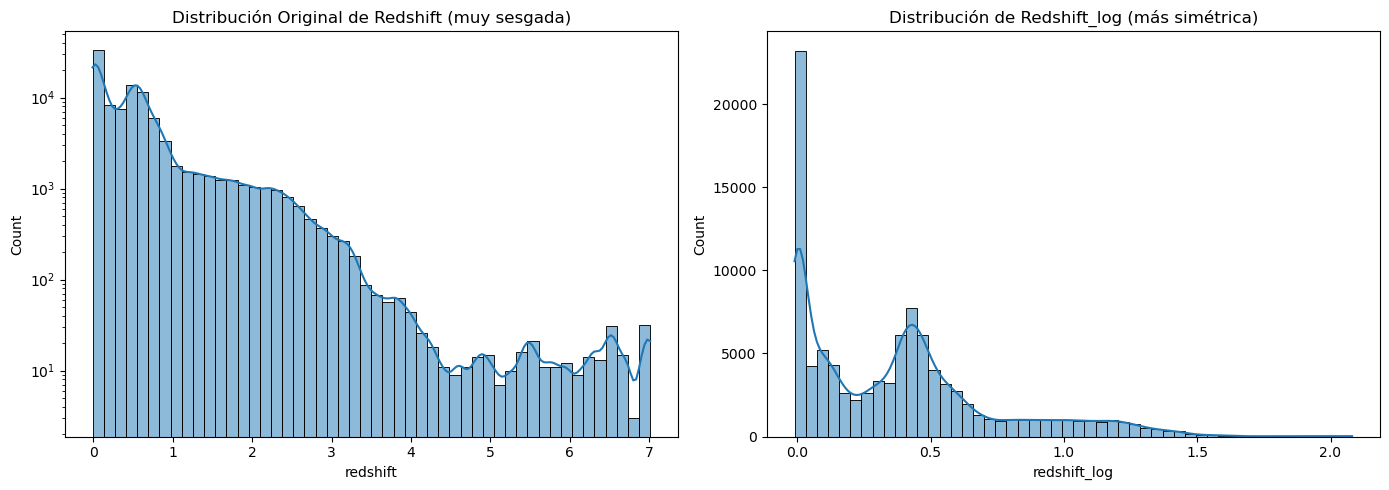

In [41]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Distribución original
sns.histplot(df_clean['redshift'], bins=50, kde=True, ax=axes[0])
axes[0].set_title('Distribución Original de Redshift (muy sesgada)')
axes[0].set_yscale('log') # Escala logarítmica en y para ver la cola

# Distribución transformada
sns.histplot(df_featured['redshift_log'], bins=50, kde=True, ax=axes[1])
axes[1].set_title('Distribución de Redshift_log (más simétrica)')

plt.tight_layout()
plt.show()

In [42]:
# === PASO 3: DEFINIR X e y, Y CODIFICAR 'y' ===
# X ahora proviene del DataFrame con las nuevas características

X = df_featured.drop(columns='class')
y_text = df_featured['class']

le = LabelEncoder()
y = le.fit_transform(y_text)
print(f"Clases codificadas: {dict(zip(le.classes_, le.transform(le.classes_)))}\n")


# === PASO 4: MUESTREO (SUBSAMPLING) ===
SAMPLE_SIZE = 0.30  # Usaremos el 30% de los datos
print(f"--- Creando una muestra del {SAMPLE_SIZE*100}% de los datos ---")

# Tomamos una muestra de X e y, manteniendo la proporción de clases con 'stratify'
X_sample, _, y_sample, _ = train_test_split(
    X, y, 
    train_size=SAMPLE_SIZE, 
    random_state=42, 
    stratify=y ## para que el tamano de la muestra no este sesgado resepecto a la tamano total 
)
print(f"Tamaño de la muestra: {len(X_sample)} filas.\n")



Clases codificadas: {'GALAXY': 0, 'QSO': 1, 'STAR': 2}

--- Creando una muestra del 30.0% de los datos ---
Tamaño de la muestra: 30000 filas.



In [43]:
 #=== PASO 5: DIVISIÓN y ESCALADO (sobre la muestra) ===
print("--- Dividiendo la muestra y escalando los datos ---")
# Dividimos la MUESTRA en conjuntos de entrenamiento y prueba (e.g., 70/30)
X_train, X_test, y_train, y_test = train_test_split(
    X_sample, y_sample,
    test_size=0.3,
    random_state=42,
    stratify=y_sample
)

# Inicializamos y ajustamos el scaler SOLO en los datos de entrenamiento de la muestra
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Datos listos para el entrenamiento.\n")


--- Dividiendo la muestra y escalando los datos ---
Datos listos para el entrenamiento.



--- Iniciando entrenamiento y evaluación de modelos ---

=== Entrenando: Logistic Regression ===
Accuracy: 0.9588
              precision    recall  f1-score   support

      GALAXY       0.97      0.96      0.97      5350
         QSO       0.94      0.90      0.92      1707
        STAR       0.95      1.00      0.97      1943

    accuracy                           0.96      9000
   macro avg       0.95      0.95      0.95      9000
weighted avg       0.96      0.96      0.96      9000



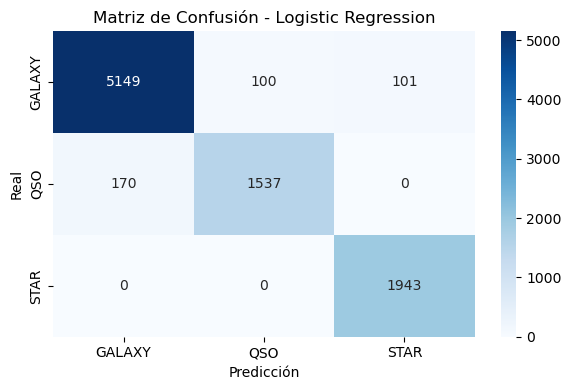


=== Entrenando: KNN ===
Accuracy: 0.9460
              precision    recall  f1-score   support

      GALAXY       0.95      0.96      0.96      5350
         QSO       0.96      0.92      0.94      1707
        STAR       0.93      0.93      0.93      1943

    accuracy                           0.95      9000
   macro avg       0.94      0.94      0.94      9000
weighted avg       0.95      0.95      0.95      9000



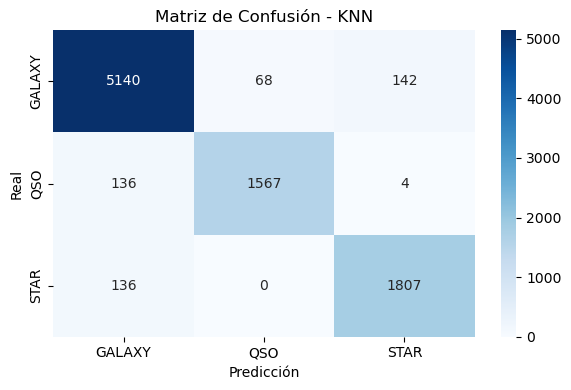


=== Entrenando: Decision Tree ===
Accuracy: 0.9646
              precision    recall  f1-score   support

      GALAXY       0.97      0.97      0.97      5350
         QSO       0.90      0.92      0.91      1707
        STAR       0.99      1.00      1.00      1943

    accuracy                           0.96      9000
   macro avg       0.96      0.96      0.96      9000
weighted avg       0.96      0.96      0.96      9000



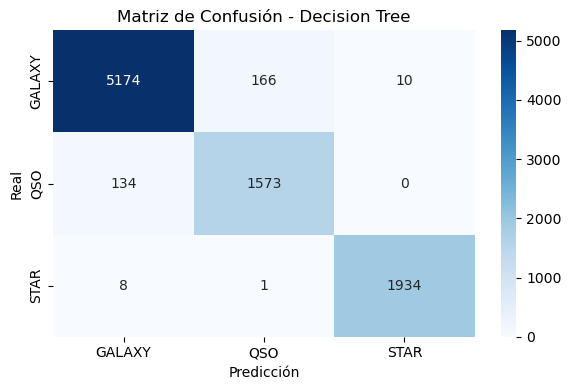


=== Entrenando: Random Forest ===
Accuracy: 0.9771
              precision    recall  f1-score   support

      GALAXY       0.98      0.98      0.98      5350
         QSO       0.96      0.94      0.95      1707
        STAR       0.98      1.00      0.99      1943

    accuracy                           0.98      9000
   macro avg       0.97      0.97      0.97      9000
weighted avg       0.98      0.98      0.98      9000



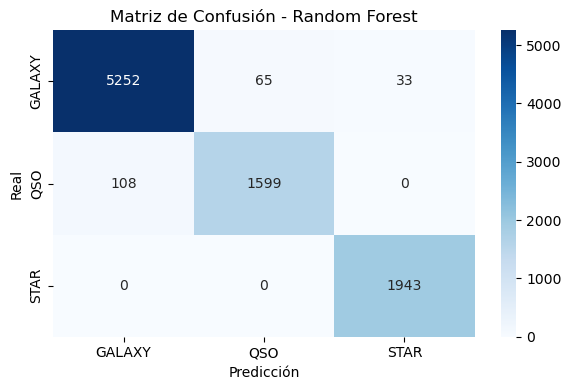


=== Entrenando: Naive Bayes ===
Accuracy: 0.9309
              precision    recall  f1-score   support

      GALAXY       0.97      0.91      0.94      5350
         QSO       0.78      0.92      0.85      1707
        STAR       0.98      0.99      0.98      1943

    accuracy                           0.93      9000
   macro avg       0.91      0.94      0.92      9000
weighted avg       0.94      0.93      0.93      9000



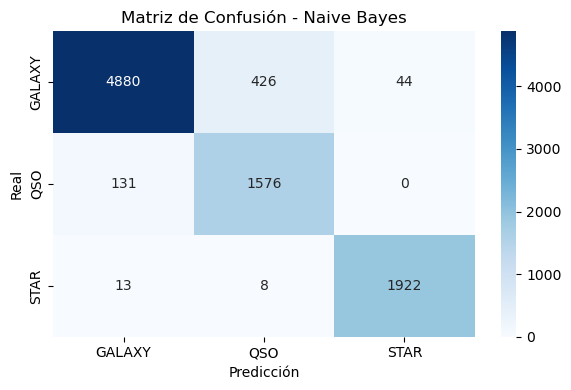


=== Entrenando: SVM ===
Accuracy: 0.9640
              precision    recall  f1-score   support

      GALAXY       0.97      0.97      0.97      5350
         QSO       0.96      0.92      0.94      1707
        STAR       0.94      0.99      0.97      1943

    accuracy                           0.96      9000
   macro avg       0.96      0.96      0.96      9000
weighted avg       0.96      0.96      0.96      9000



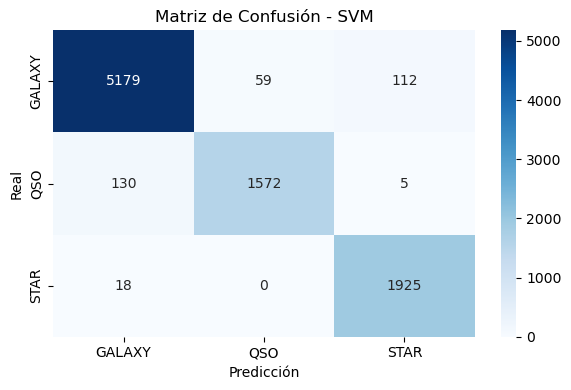


=== Entrenando: Neural Network ===
Accuracy: 0.9744
              precision    recall  f1-score   support

      GALAXY       0.98      0.98      0.98      5350
         QSO       0.96      0.94      0.95      1707
        STAR       0.97      1.00      0.99      1943

    accuracy                           0.97      9000
   macro avg       0.97      0.97      0.97      9000
weighted avg       0.97      0.97      0.97      9000



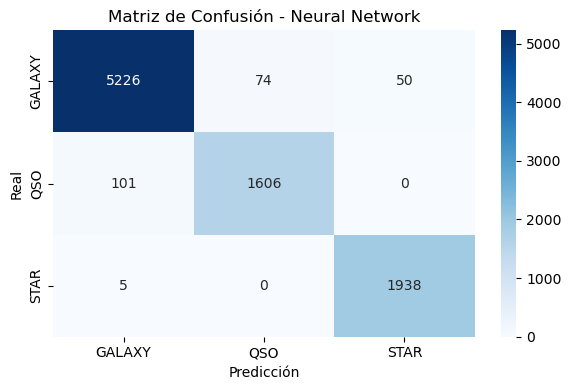



=== Comparación de modelos (entrenados en muestra del 30%) ===


,Modelo,Accuracy,F1-score
0,Random Forest,0.977111,0.973675
1,Neural Network,0.974444,0.970936
2,SVM,0.964000,0.959376
3,Decision Tree,0.964556,0.959325
4,Logistic Regression,0.958778,0.953051
5,KNN,0.946000,0.940198
6,Naive Bayes,0.930889,0.924060


In [44]:
# === PASO 6: ENTRENAMIENTO Y EVALUACIÓN DE MODELOS (sobre la muestra) ===
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, n_jobs=-1),
    'KNN': KNeighborsClassifier(n_jobs=-1),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42, n_jobs=-1),
    'Naive Bayes': GaussianNB(),
    'SVM': SVC(random_state=42),
    'Neural Network': MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
}

resultados = []

print("--- Iniciando entrenamiento y evaluación de modelos ---")
for name, model in models.items():
    print(f"\n=== Entrenando: {name} ===")
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, target_names=le.classes_, output_dict=True)
    f1_macro = report['macro avg']['f1-score']

    resultados.append({
        'Modelo': name,
        'Accuracy': acc,
        'F1-score': f1_macro
    })

    print(f"Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred, target_names=le.classes_))

    # Matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=le.classes_, yticklabels=le.classes_)
    plt.title(f"Matriz de Confusión - {name}")
    plt.xlabel("Predicción")
    plt.ylabel("Real")
    plt.tight_layout()
    plt.show()

# === PASO 7: TABLA FINAL DE COMPARACIÓN ===
df_resultados = pd.DataFrame(resultados)
df_resultados = df_resultados.sort_values(by='F1-score', ascending=False).reset_index(drop=True)

print("\n\n=== Comparación de modelos (entrenados en muestra del 30%) ===")
display(df_resultados)

In [48]:
# --- Celda 9: Preparación de Datos para el Ajuste de Hiperparámetros ---

# 'X_sample' y 'y_sample' ya están definidos de la Celda 4.
# Vamos a escalarlos. No necesitamos dividirlos, GridSearchCV lo hará internamente con CV.
scaler_for_tuning = StandardScaler()
X_sample_scaled = scaler_for_tuning.fit_transform(X_sample)

print(f"Datos de muestra escalados y listos para la búsqueda. Dimensiones: {X_sample_scaled.shape}")

Datos de muestra escalados y listos para la búsqueda. Dimensiones: (30000, 12)


In [50]:
# --- Celda 10: Búsqueda de Hiperparámetros - Random Forest ---
from sklearn.model_selection import GridSearchCV
import time

print("--- Iniciando GridSearchCV para Random Forest (en muestra del 30%) ---")

# Espacio de parámetros a explorar
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Crear el objeto GridSearchCV
# cv=3 es más rápido para el ajuste. 5 es más robusto. Elige según tu paciencia.
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Ajustar a los datos de la muestra
start_time = time.time()
grid_rf.fit(X_sample_scaled, y_sample)
end_time = time.time()

# Guardar los mejores parámetros
best_params_rf = grid_rf.best_params_
print(f"\nMejores parámetros para Random Forest: {best_params_rf}")
print(f"Mejor score de CV (accuracy): {grid_rf.best_score_:.4f}")
print(f"Tiempo de búsqueda: {end_time - start_time:.2f} segundos")

--- Iniciando GridSearchCV para Random Forest (en muestra del 30%) ---
Fitting 5 folds for each of 24 candidates, totalling 120 fits

Mejores parámetros para Random Forest: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Mejor score de CV (accuracy): 0.9772
Tiempo de búsqueda: 125.87 segundos


In [52]:
# --- Celda 12: Búsqueda de Hiperparámetros - Neural Network ---
print("\n--- Iniciando GridSearchCV para Neural Network (en muestra del 30%) ---")

# Espacio de parámetros a explorar
param_grid_mlp = {
    'hidden_layer_sizes': [(50, 50), (100,), (100, 50)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001] # Parámetro de regularización L2
}

grid_mlp = GridSearchCV(MLPClassifier(max_iter=500, random_state=42, early_stopping=True), 
                        param_grid_mlp, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

start_time = time.time()
grid_mlp.fit(X_sample_scaled, y_sample)
end_time = time.time()

best_params_mlp = grid_mlp.best_params_
print(f"\nMejores parámetros para Neural Network: {best_params_mlp}")
print(f"Mejor score de CV (accuracy): {grid_mlp.best_score_:.4f}")
print(f"Tiempo de búsqueda: {end_time - start_time:.2f} segundos")


--- Iniciando GridSearchCV para Neural Network (en muestra del 30%) ---
Fitting 5 folds for each of 12 candidates, totalling 60 fits

Mejores parámetros para Neural Network: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (100, 50)}
Mejor score de CV (accuracy): 0.9713
Tiempo de búsqueda: 34.98 segundos


In [54]:
# --- Celda 11: Búsqueda de Hiperparámetros - SVM ---
print("\n--- Iniciando GridSearchCV para SVM (en muestra del 30%) ---")
print("Esto puede ser lento...")

# Espacio de parámetros a explorar
# C: Parámetro de regularización.
# gamma: Coeficiente del kernel. 'scale' es un buen valor por defecto.
param_grid_svm = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto'],
    'kernel': ['rbf'] # Nos enfocamos en el kernel más potente
}

grid_svm = GridSearchCV(SVC(random_state=42), param_grid_svm, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

start_time = time.time()
grid_svm.fit(X_sample_scaled, y_sample)
end_time = time.time()

best_params_svm = grid_svm.best_params_
print(f"\nMejores parámetros para SVM: {best_params_svm}")
print(f"Mejor score de CV (accuracy): {grid_svm.best_score_:.4f}")
print(f"Tiempo de búsqueda: {end_time - start_time:.2f} segundos")


--- Iniciando GridSearchCV para SVM (en muestra del 30%) ---
Esto puede ser lento...
Fitting 5 folds for each of 6 candidates, totalling 30 fits

Mejores parámetros para SVM: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Mejor score de CV (accuracy): 0.9688
Tiempo de búsqueda: 33.55 segundos


In [55]:
# --- Celda de Preparación: Escalar el 100% de los Datos ---

from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# Asumiendo que 'X' (con feature engineering) y 'y' (codificada) están definidos
print("--- Escalanado el dataset completo (100%) ---")
scaler_full = StandardScaler()
X_full_scaled = scaler_full.fit_transform(X)

print(f"Datos listos para la validación final. Dimensiones: {X_full_scaled.shape}")

# Asumiendo que tienes los mejores hiperparámetros guardados de la fase anterior
# Ejemplo:
# best_params_rf = {'n_estimators': 200, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}
# best_params_svm = {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
# best_params_mlp = {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (100, 50)}

--- Escalanado el dataset completo (100%) ---
Datos listos para la validación final. Dimensiones: (100000, 12)


In [56]:
# --- Validación Cruzada Final: Random Forest (100% de los datos) ---

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
import time

print("--- Iniciando Validación Cruzada para Random Forest ---")

# 1. Definir el modelo con sus mejores hiperparámetros
rf_model_final = RandomForestClassifier(random_state=42, n_jobs=-1, **best_params_rf)

# 2. Realizar la validación cruzada y medir el tiempo
start_time = time.time()
rf_final_scores = cross_val_score(rf_model_final, X_full_scaled, y, cv=5, scoring='accuracy', n_jobs=-1)
end_time = time.time()

# 3. Reportar resultados
print("\n--- Resultados Finales de Random Forest ---")
print(f"Scores de cada fold: {rf_final_scores}")
print(f"Accuracy Promedio (CV): {rf_final_scores.mean():.4f}")
print(f"Desviación Estándar (CV): {rf_final_scores.std():.4f}")
print(f"Tiempo total de ejecución (5 folds): {end_time - start_time:.2f} segundos")

--- Iniciando Validación Cruzada para Random Forest ---

--- Resultados Finales de Random Forest ---
Scores de cada fold: [0.97925 0.97905 0.97795 0.98    0.978  ]
Accuracy Promedio (CV): 0.9788
Desviación Estándar (CV): 0.0008
Tiempo total de ejecución (5 folds): 28.99 segundos


In [57]:
# --- Validación Cruzada Final: Neural Network (100% de los datos) ---

from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier
import time

print("--- Iniciando Validación Cruzada para Neural Network ---")
print("Esto puede tardar un tiempo considerable...")

# 1. Definir el modelo con sus mejores hiperparámetros
mlp_model_final = MLPClassifier(random_state=42, **best_params_mlp)

# 2. Realizar la validación cruzada y medir el tiempo
start_time = time.time()
mlp_final_scores = cross_val_score(mlp_model_final, X_full_scaled, y, cv=5, scoring='accuracy', n_jobs=-1)
end_time = time.time()

# 3. Reportar resultados
print("\n--- Resultados Finales de Neural Network ---")
print(f"Scores de cada fold: {mlp_final_scores}")
print(f"Accuracy Promedio (CV): {mlp_final_scores.mean():.4f}")
print(f"Desviación Estándar (CV): {mlp_final_scores.std():.4f}")
print(f"Tiempo total de ejecución (5 folds): {end_time - start_time:.2f} segundos")

--- Iniciando Validación Cruzada para Neural Network ---
Esto puede tardar un tiempo considerable...

--- Resultados Finales de Neural Network ---
Scores de cada fold: [0.9739  0.97385 0.97235 0.9724  0.97385]
Accuracy Promedio (CV): 0.9733
Desviación Estándar (CV): 0.0007
Tiempo total de ejecución (5 folds): 67.31 segundos


In [58]:
# --- Validación Cruzada Final: SVM (100% de los datos) ---

from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
import time

print("--- Iniciando Validación Cruzada para SVM ---")
print("Este será probablemente el proceso más lento...")

# 1. Definir el modelo con sus mejores hiperparámetros
svm_model_final = SVC(random_state=42, **best_params_svm)

# 2. Realizar la validación cruzada y medir el tiempo
start_time = time.time()
svm_final_scores = cross_val_score(svm_model_final, X_full_scaled, y, cv=5, scoring='accuracy', n_jobs=-1)
end_time = time.time()

# 3. Reportar resultados
print("\n--- Resultados Finales de SVM ---")
print(f"Scores de cada fold: {svm_final_scores}")
print(f"Accuracy Promedio (CV): {svm_final_scores.mean():.4f}")
print(f"Desviación Estándar (CV): {svm_final_scores.std():.4f}")
print(f"Tiempo total de ejecución (5 folds): {end_time - start_time:.2f} segundos")

--- Iniciando Validación Cruzada para SVM ---
Este será probablemente el proceso más lento...

--- Resultados Finales de SVM ---
Scores de cada fold: [0.96935 0.9697  0.9691  0.97105 0.9694 ]
Accuracy Promedio (CV): 0.9697
Desviación Estándar (CV): 0.0007
Tiempo total de ejecución (5 folds): 60.48 segundos


--- Generando Curvas de Aprendizaje ---

Generando curva para Random Forest...


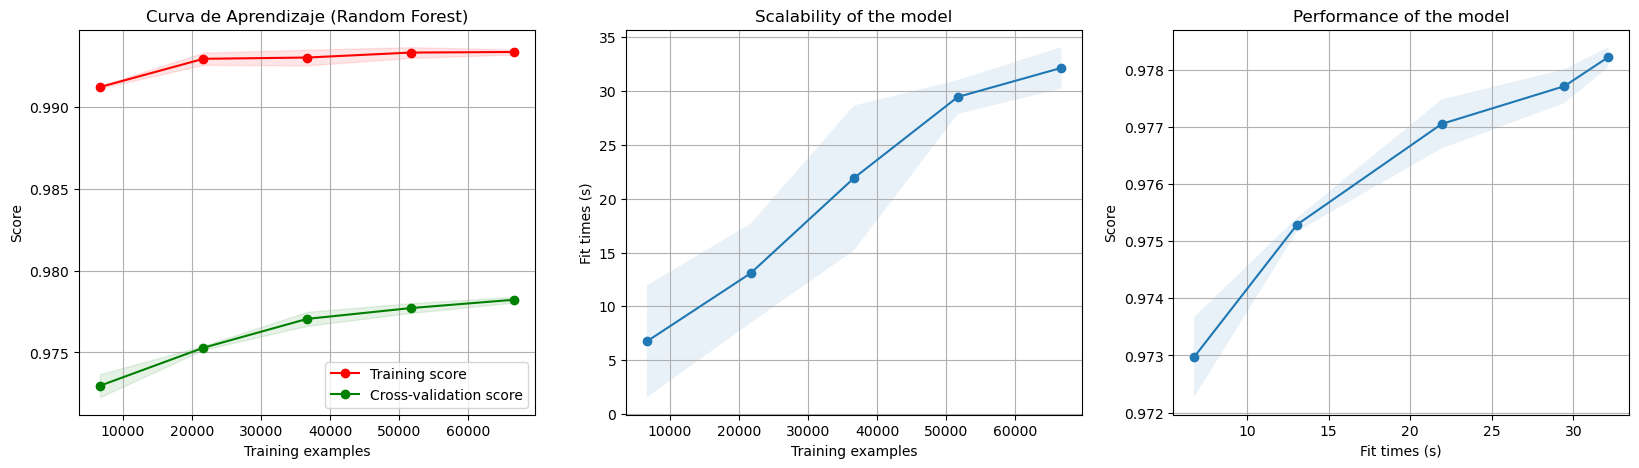


Generando curva para Neural Network...


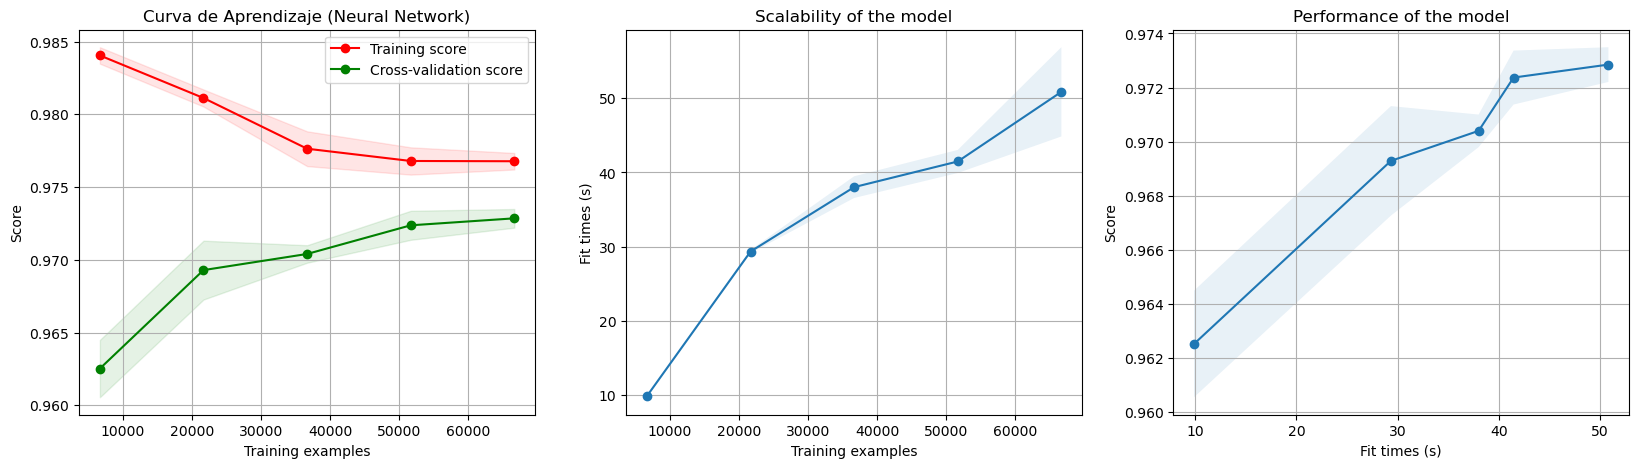


Generando curva para SVM (en una muestra del 70% para acelerar)...


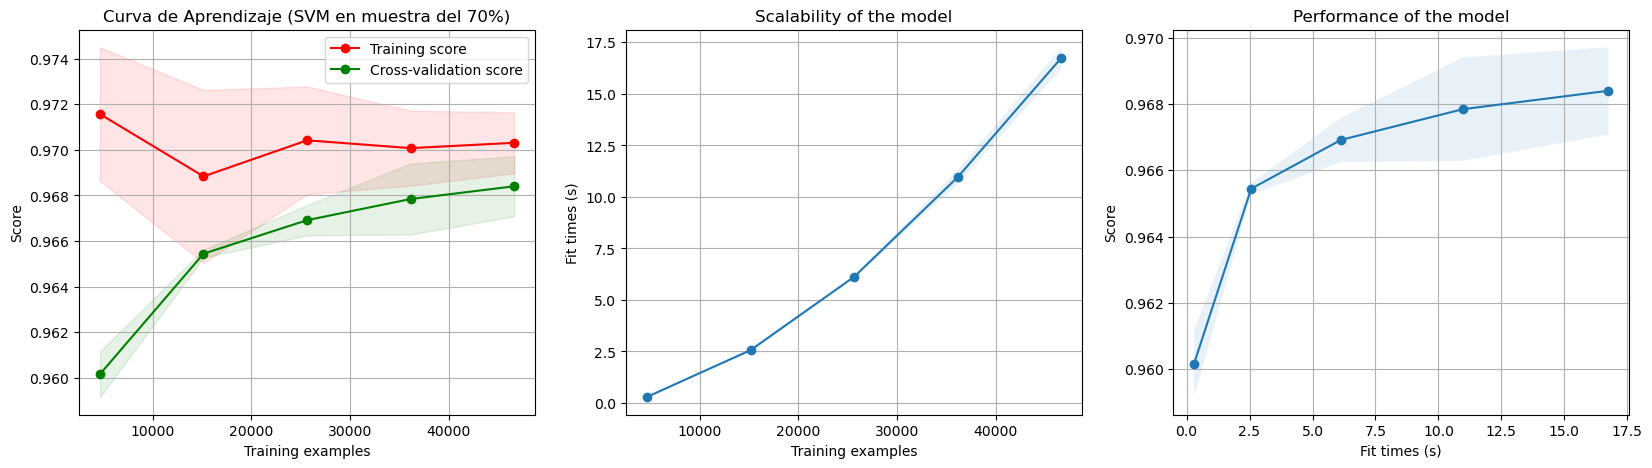

In [60]:
# --- Celda Final: Curvas de Aprendizaje Comparativas ---

from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np
import time

# --- 1. Función Auxiliar para Graficar las Curvas de Aprendizaje ---
# Esta función reutilizable nos ahorrará mucho código.
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Genera 3 plots: la curva de aprendizaje, el tiempo de escalado y el score de escalado.
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes,
        return_times=True, scoring='accuracy')
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot de la curva de aprendizaje
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot de escalabilidad del tiempo de entrenamiento
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("Fit times (s)")
    axes[1].set_title("Scalability of the model")

    # Plot de rendimiento vs tiempo de entrenamiento
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("Fit times (s)")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

# --- 2. Definir los Modelos Optimizados ---
# Usamos los diccionarios con los mejores hiperparámetros que ya tienes
rf_model_final = RandomForestClassifier(random_state=42, n_jobs=-1, **best_params_rf)
mlp_model_final = MLPClassifier(random_state=42, **best_params_mlp)
svm_model_final = SVC(random_state=42, **best_params_svm)

# --- 3. Generar las Curvas ---
# Usaremos cv=3 para que el proceso sea más rápido.
CV_FOLDS_LC = 3

print("--- Generando Curvas de Aprendizaje ---")

# Para Random Forest (en el 100% de los datos)
print("\nGenerando curva para Random Forest...")
plot_learning_curve(rf_model_final, "Curva de Aprendizaje (Random Forest)", X_full_scaled, y, cv=CV_FOLDS_LC)
plt.show()

# Para Neural Network (en el 100% de los datos)
print("\nGenerando curva para Neural Network...")
plot_learning_curve(mlp_model_final, "Curva de Aprendizaje (Neural Network)", X_full_scaled, y, cv=CV_FOLDS_LC)
plt.show()

# Para SVM (en una muestra grande para ahorrar tiempo)
print("\nGenerando curva para SVM (en una muestra del 70% para acelerar)...")
# Usaremos los datos del split 70/30 que preparamos antes.
# Asumiendo que X_train_scaled y y_train están disponibles de esa preparación.
# Si no, crea una muestra aquí.
X_sample_svm, _, y_sample_svm, _ = train_test_split(X_full_scaled, y, train_size=0.7, stratify=y, random_state=42)
plot_learning_curve(svm_model_final, "Curva de Aprendizaje (SVM en muestra del 70%)", X_sample_svm, y_sample_svm, cv=CV_FOLDS_LC)
plt.show()

--- Calculando la Matriz de Correlación de Spearman ---


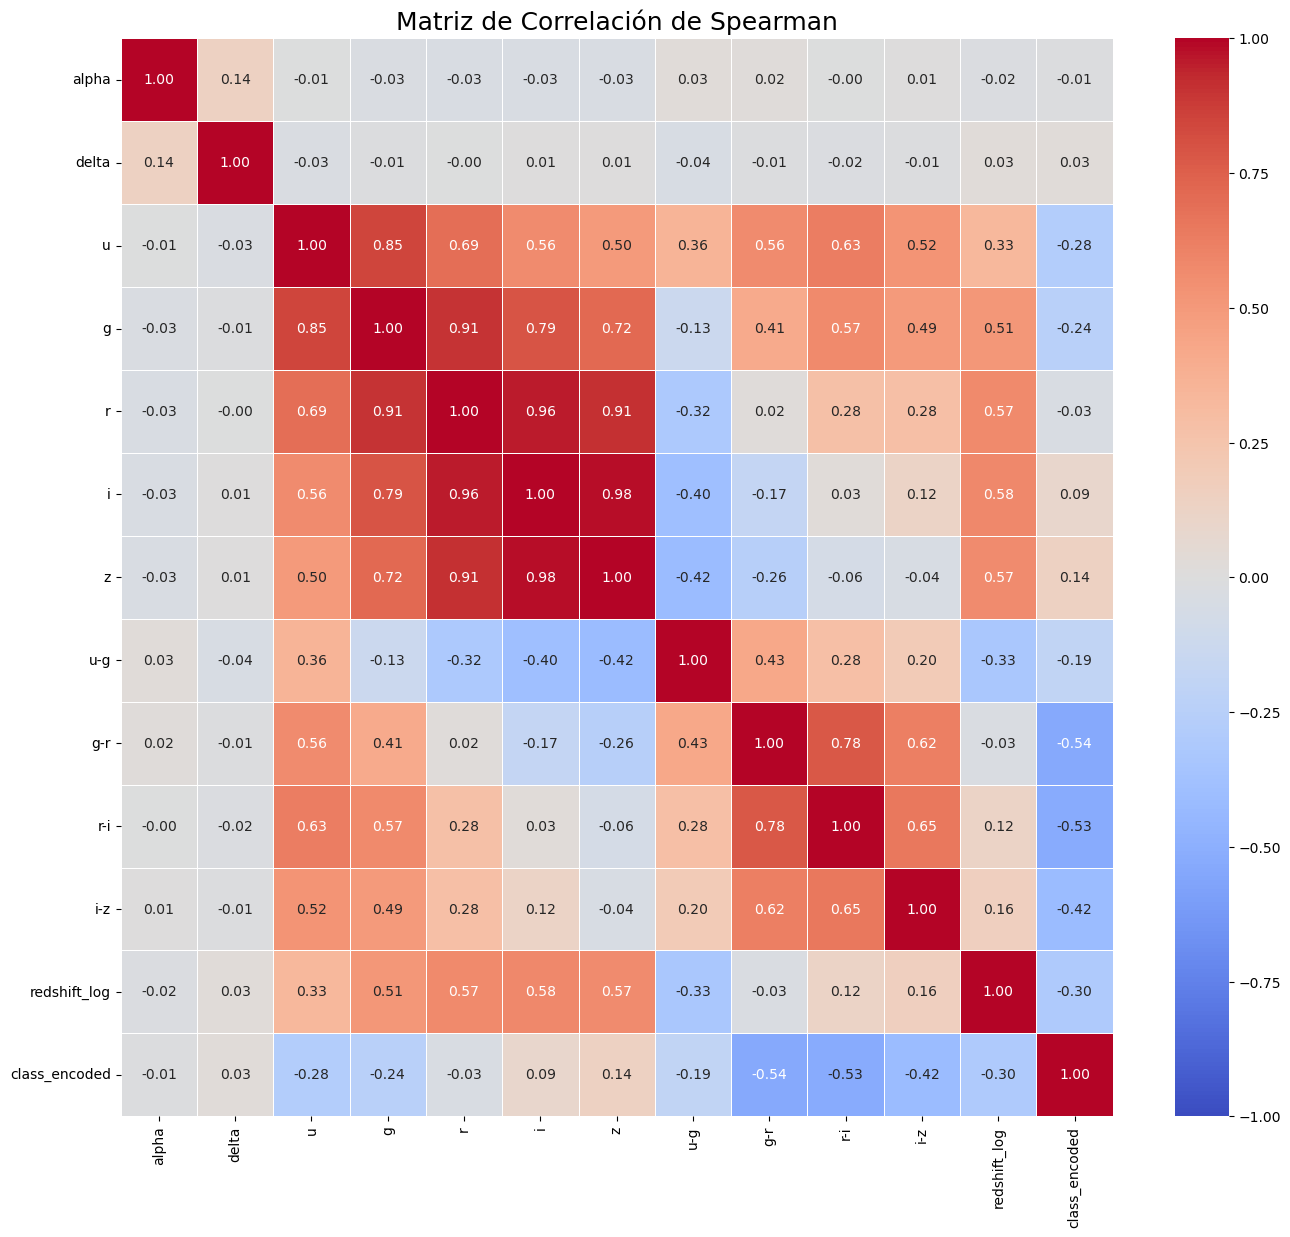

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# --- Preparación de los Datos para la Correlación ---

# Asumiendo que tienes tu DataFrame con ingeniería de características 'df_featured'
# y el LabelEncoder 'le' ya ajustado.

# Crear una copia para el análisis de correlación
df_corr = df_featured.copy()

# Necesitamos la columna 'class' en formato numérico para incluirla en la matriz.
# Usaremos el LabelEncoder que ya teníamos.
df_corr['class_encoded'] = le.transform(df_corr['class'])

# Eliminamos la columna de texto original 'class' para que la matriz sea puramente numérica.
df_corr = df_corr.drop(columns=['class'])


# --- Cálculo y Visualización de la Matriz de Correlación de Spearman ---

print("--- Calculando la Matriz de Correlación de Spearman ---")
# Usamos method='spearman' para calcular la correlación de rango.
corr_matrix_spearman = df_corr.corr(method='spearman')

# Crear el mapa de calor para visualizar la matriz
plt.figure(figsize=(16, 14))
sns.heatmap(
    corr_matrix_spearman,
    annot=True,         # Muestra los valores numéricos en cada celda
    fmt='.2f',          # Formatea los números a dos decimales
    cmap='coolwarm',    # Elige un mapa de color divergente
    linewidths=.5,      # Añade líneas delgadas entre las celdas
    vmin=-1, vmax=1     # Fija el rango de la barra de color de -1 a 1
)
plt.title('Matriz de Correlación de Spearman', fontsize=18)
plt.show()

In [64]:
# 'df_local' ya contiene los objetos con redshift bajo.
# Ahora, seleccionamos solo aquellos clasificados como 'STAR'.
df_stars = df_local[df_local['class'] == 'STAR'].copy()

print(f"Dataset de estrellas aislado. Contiene {len(df_stars)} estrellas.")
display(df_stars.head())

Dataset de estrellas aislado. Contiene 21594 estrellas.


,alpha,delta,u,g,r,i,z,class,redshift
9,39.149691,28.102842,21.74669,20.03493,19.17553,18.81823,18.65422,STAR,-0.000008
12,345.801874,32.672868,23.17274,20.14496,19.41948,19.22034,18.89359,STAR,0.000072
16,353.201522,3.080796,24.54890,21.44267,20.95315,20.79360,20.48442,STAR,-0.000429
18,14.383135,3.214326,21.82154,20.55730,19.94918,19.76057,19.55514,STAR,-0.000440
21,144.785293,46.826496,24.54793,22.33601,20.92259,19.87177,19.16934,STAR,-0.000120


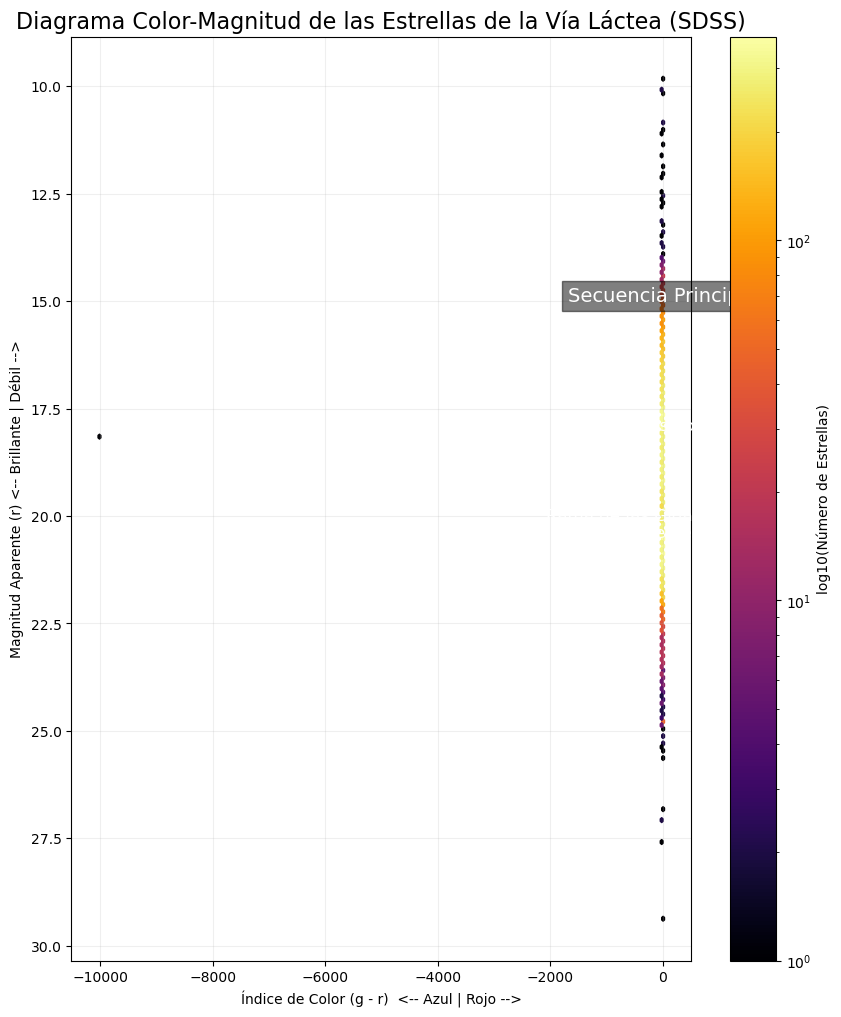

In [65]:
# --- Creando el Diagrama Color-Magnitud (CMD) ---

# Para que el gráfico sea más intuitivo, necesitamos un índice de color en el eje X
# y una magnitud en una sola banda en el eje Y. 'g-r' y 'r' son una elección clásica.
df_stars['g-r'] = df_stars['g'] - df_stars['r']

plt.figure(figsize=(10, 12))

# Usamos un 'hexbin' plot porque tenemos muchas estrellas y un scatter plot sería una mancha sólida.
# hexbin agrupa los puntos en hexágonos y colorea el hexágono según la densidad de puntos.
hb = plt.hexbin(
    x=df_stars['g-r'],
    y=df_stars['r'],
    gridsize=200,      # Aumenta este número para hexágonos más pequeños
    cmap='inferno',    # Un mapa de color que va de oscuro (pocos puntos) a brillante (muchos puntos)
    bins='log'         # Escala logarítmica para ver mejor las regiones de baja densidad
)

# Invertimos el eje Y porque una magnitud más baja (arriba) significa más brillante.
plt.gca().invert_yaxis()

# Añadir etiquetas y título
plt.title('Diagrama Color-Magnitud de las Estrellas de la Vía Láctea (SDSS)', fontsize=16)
plt.xlabel('Índice de Color (g - r)  <-- Azul | Rojo -->')
plt.ylabel('Magnitud Aparente (r) <-- Brillante | Débil -->')

# Añadir una barra de color para la densidad
cb = plt.colorbar(hb, label='log10(Número de Estrellas)')

# Anotar las regiones principales
plt.text(0.4, 15, 'Secuencia Principal', fontsize=14, color='white', ha='center', bbox=dict(facecolor='black', alpha=0.5))
plt.text(1.0, 18, '(Enanas Rojas)', fontsize=12, color='white', ha='center')
plt.text(0.6, 20.5, 'Rama de las Gigantes Rojas\n(posiblemente)', fontsize=12, color='white', ha='center')

plt.grid(True, alpha=0.2)
plt.show()

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Asumo que tu DataFrame se llama 'df'
# df = pd.read_csv('tu_archivo.csv') # Si lo lees de un archivo

# Primero, filtramos solo las estrellas, como ya hiciste.
# Usamos .copy() para evitar advertencias de pandas.
df_stars = df[df['class'] == 'STAR'].copy()

# Calculamos el índice de color 'g-r' si no lo tienes ya en df_stars
if 'g-r' not in df_stars.columns:
    df_stars['g-r'] = df_stars['g'] - df_stars['r']

# --- Identificación del Outlier ---
# Definimos los límites para lo que consideramos "normal".
# Buscaremos objetos fuera de este rango de color.
# Puedes ajustar estos valores basándote en tu gráfico.
limite_azul = -0.5
limite_rojo = 2.5

# Filtramos para encontrar los outliers
outliers = df_stars[
    (df_stars['g-r'] < limite_azul) | (df_stars['g-r'] > limite_rojo)
]

# Imprimimos los objetos anómalos encontrados
if not outliers.empty:
    print("¡Se encontraron objetos anómalos!")
    print(outliers)
else:
    print("No se encontraron outliers con los criterios definidos. Prueba a ajustar los límites.")

¡Se encontraron objetos anómalos!
             obj_ID       alpha      delta         u         g         r  \
38     1.237661e+18  136.418378  36.152679  20.66654  22.21825  24.80260   
78     1.237661e+18   64.875625  28.130923  23.78648  22.61023  19.79689   
837    1.237666e+18  330.375765  21.241131  25.62583  24.89984  21.78113   
983    1.237681e+18  355.056762  33.816504  22.67229  21.26253  24.80203   
1031   1.237661e+18  136.616270  32.895771  22.40418  25.86097  22.93793   
...             ...         ...        ...       ...       ...       ...   
99187  1.237656e+18  232.694160   4.744344  18.18226  18.61260  19.13020   
99374  1.237661e+18   71.975900  25.549576  25.41594  24.38940  20.73663   
99549  1.237664e+18  190.356629  40.586553  24.63465  21.49318  24.80203   
99614  1.237660e+18  123.512109  27.123404  22.05061  21.96192  24.80202   
99846  1.237659e+18  243.109559  40.468151  24.67105  25.07075  18.38776   

              i         z  run_ID  rerun_ID  cam_col 

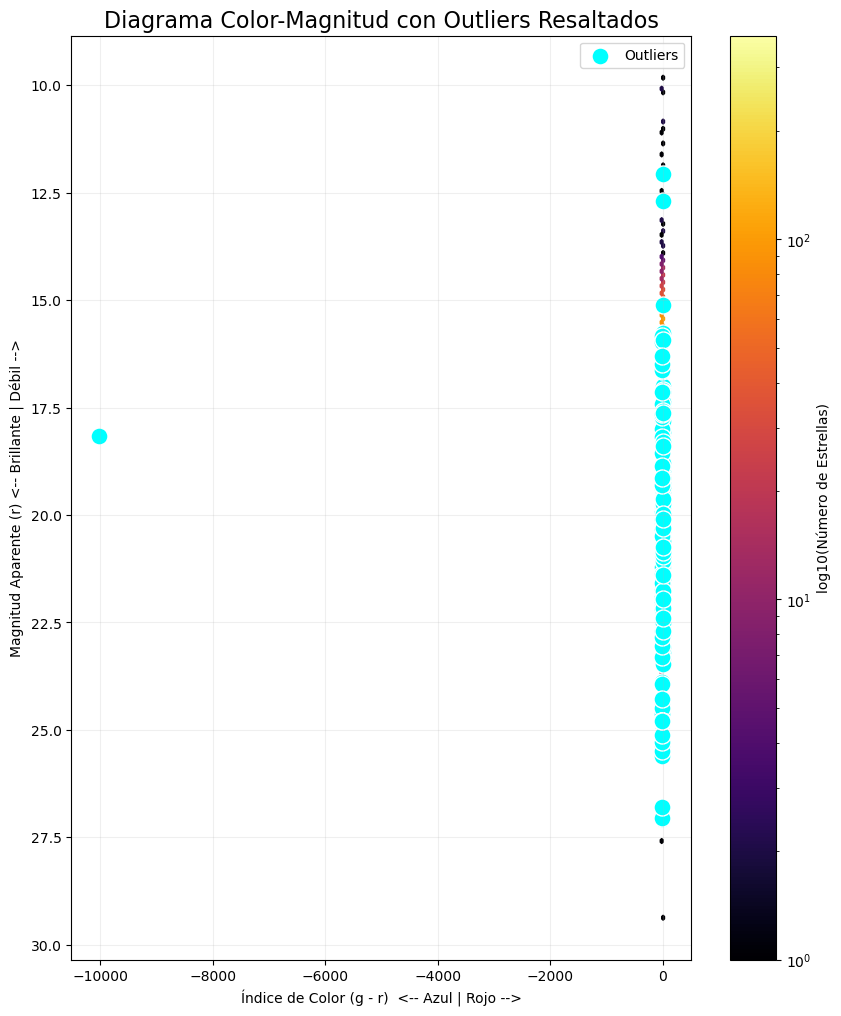

In [67]:
plt.figure(figsize=(10, 12))

# 1. Dibujamos el hexbin plot de todas las estrellas como antes
hb = plt.hexbin(
    x=df_stars['g-r'],
    y=df_stars['r'],
    gridsize=200,
    cmap='inferno',
    bins='log'
)

# 2. Sobreponemos los outliers con un scatter plot
# Esto los dibujará encima del mapa de calor
if not outliers.empty:
    plt.scatter(
        outliers['g-r'],
        outliers['r'],
        color='cyan',      # Un color que resalte
        edgecolor='white', # Borde blanco para mayor visibilidad
        s=150,             # Tamaño grande
        label='Outliers'   # Etiqueta para la leyenda
    )
    plt.legend()


# Configuraciones del gráfico (como ya las tenías)
plt.gca().invert_yaxis()
plt.title('Diagrama Color-Magnitud con Outliers Resaltados', fontsize=16)
plt.xlabel('Índice de Color (g - r)  <-- Azul | Rojo -->')
plt.ylabel('Magnitud Aparente (r) <-- Brillante | Débil -->')
cb = plt.colorbar(hb, label='log10(Número de Estrellas)')
plt.grid(True, alpha=0.2)
plt.show()